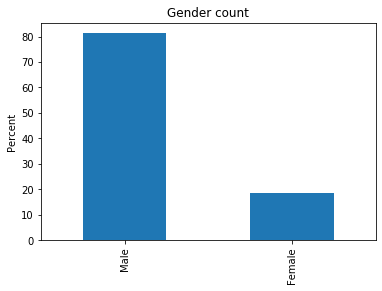

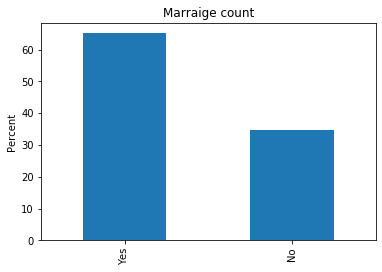

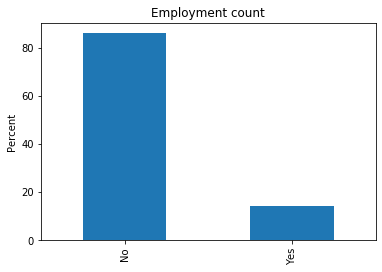

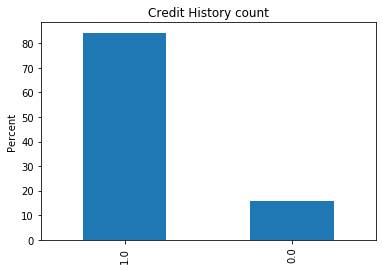

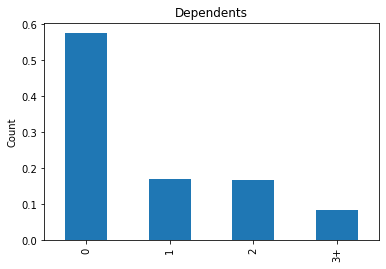

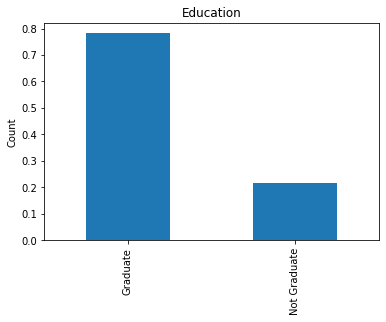

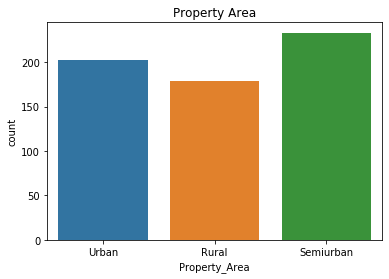

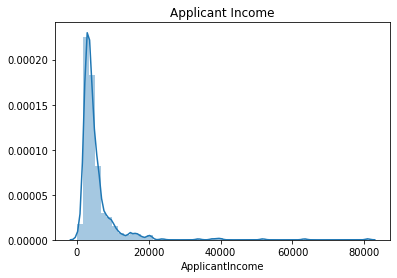

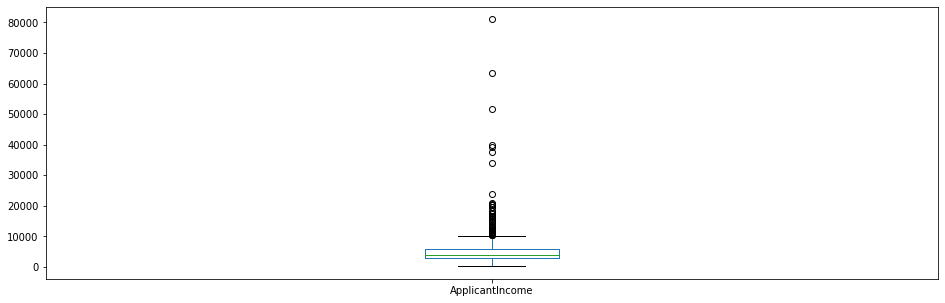

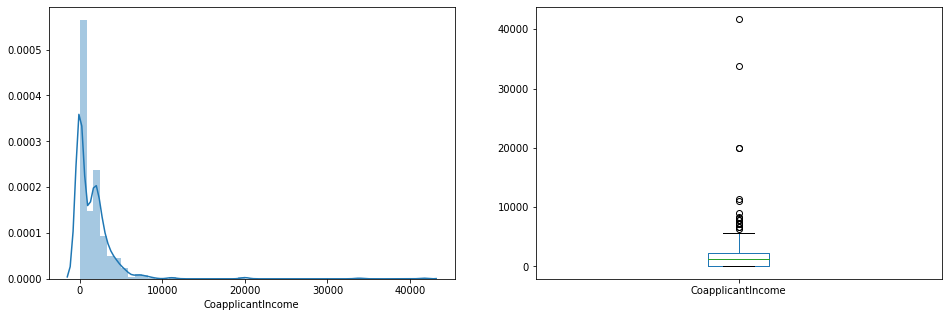

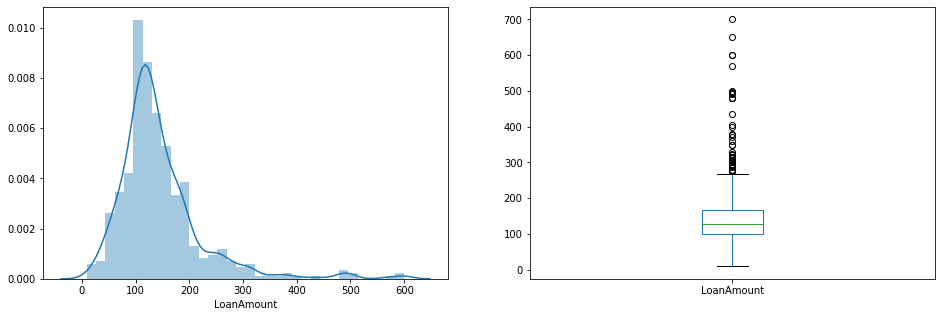

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


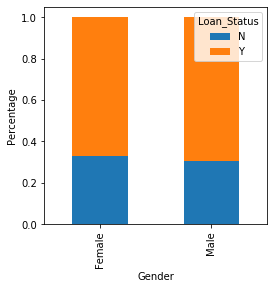

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


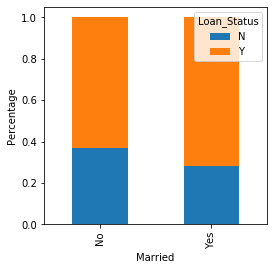

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


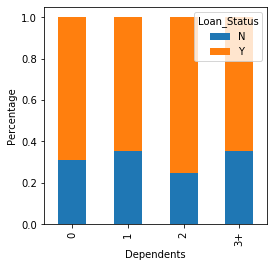

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


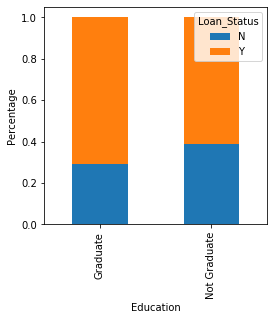

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


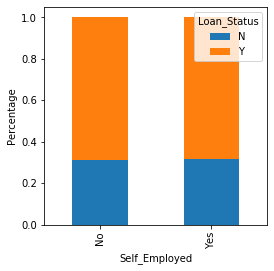

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


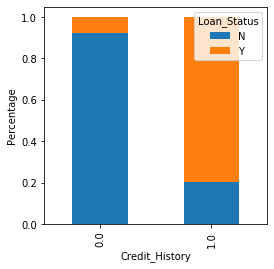

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


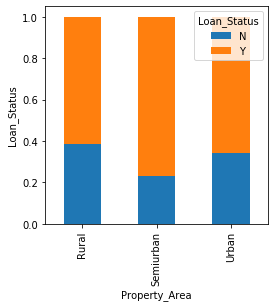

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ali\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ali\anaconda3\lib\site-packages\ipykernel_launcher.py:270: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


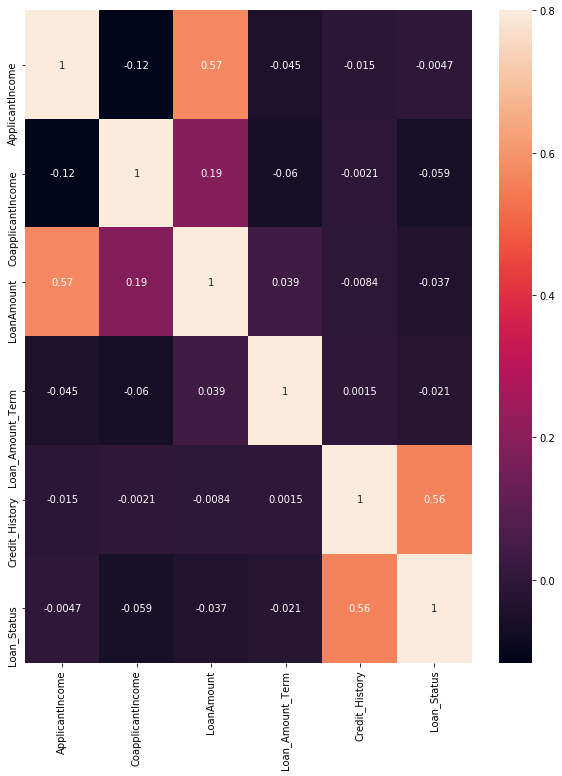

In [1]:
#import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


#read train amd test data
train= pd.read_csv("train.csv")
#print first 5 rows of train data
train.head()
#print first 5 rows of test data
test= pd.read_csv("test.csv")
test.head()

#to check the features of data
train.columns
test.columns

#to check the data types of the features
train.dtypes

#to check shape of the data set
train.shape
test.shape


#ANALYSIS OF DATA


#analysing the categorical variable Gender
plt.title('Gender count')
b=train['Gender'].value_counts(normalize=True)*100
b.plot.bar()
plt.ylabel('Percent')
plt.show()

#analysing the categorical variable Married
plt.title('Marraige count')
c=train['Married'].value_counts(normalize=True)*100
c.plot.bar()
plt.ylabel('Percent')
plt.show()

#analysing the categorical variable Self Employed
plt.title('Employment count')
d=train['Self_Employed'].value_counts(normalize=True)*100
d.plot.bar()
plt.ylabel('Percent')
plt.show()

#analysing the categorical variable credit History
plt.title('Credit History count')
e=train['Credit_History'].value_counts(normalize=True)*100
e.plot.bar()
plt.ylabel('Percent')
plt.show()


#analysing the categorical variable Number of dependents(ordinal)
plt.title('Dependents')
train['Dependents'].value_counts(normalize=True).plot.bar()
plt.ylabel('Count')
plt.show()

#analysing the categorical variable education(ordinal)
plt.title('Education')
train['Education'].value_counts(normalize=True).plot.bar()
plt.ylabel('Count')
plt.show()

#analysing the categorical variable Property area(ordinal)
plt.title('Property Area')
sns.countplot(data=train, x=train['Property_Area'])
plt.show()

#analysing the numerical variable Applicant Income
plt.title('Applicant Income')
sns.distplot(train['ApplicantIncome'])
plt.show()
#box plot
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

#analysing the numerical variable co-Applicant Income
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);
#box plot
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

#analysing the numerical variable Loan Amount
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);
#box plot
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

#analysing the numerical variable Loan Amount Term
#plt.subplot(121)
#df = train.dropna()
#sns.distplot(df["Loan_Amount_Term"]);
#box plot
#plt.subplot(122)
#df["Loan_Amount_Term"].plot.box(figsize=(16,5))
#plt.show()


#Analysing target variable vs Gender
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

#Analysing target variable vs Married
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

#Analysing target variable vs Dependents
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

#Analysing target variable vs Education
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

#Analysing target variable vs Self Employed
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

#Analysing target variable vs Credit History
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

#Analysing target variable vs Property area
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

#DATA CLEANING:

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

#Correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8,annot=True);

#finding the number of missing values in each variable
train.isnull().sum()
#Treating the missing values of categorical variables using mode
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
#Treating the categorical variables using mean or median
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)
#checking the corrected missing values are null
test.isnull().sum()
#applying the same as above to the test data set
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

#BUILDING MODELS

#LOGISTIC REGRESSION

#removing the variable loan ID
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

#training independent data
X=train.drop("Loan_Status",1)
#target variable
y=train[["Loan_Status"]]
#treating the catergorical variables for inputting in linear model
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

#splitting the data set into training and validation data set
xtrain,xv,ytrain,yv=train_test_split(X,y,test_size=0.3,random_state=1)

#initializing the model
logisticmodel = LogisticRegression(random_state=1)

#fitting the model
logisticmodel.fit(xtrain,ytrain)
#predicting for validation set
pred=logisticmodel.predict(xv)

#calculation accuracy score
score =accuracy_score(pred,yv)*100 
score

#predicting for test data
predtest = logisticmodel.predict(test)



#DECISION TREE

#initializing the model
treemodel = DecisionTreeClassifier(random_state=1)

#fitting the model
treemodel.fit(xtrain,ytrain)
#predicting for validation set
predtree=treemodel.predict(xv)

#calculation accuracy score
scoretree =accuracy_score(predtree,yv)*100 
scoretree

#predicting for test data
pred_test = treemodel.predict(test)


#RANDOM FOREST 

#initializing the model
forestmodel = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

#fitting the model
forestmodel.fit(xtrain,ytrain)
#predicting for validation set
predforest=forestmodel.predict(xv)

#calculation accuracy score
scoreforest = accuracy_score(predforest,yv)*100
scoreforest

#predicting for test data
predtestforest=forestmodel.predict(test)

train.head()

